In [1]:
import NDEToolkit as ndt

### Class

In [2]:
import math
import numpy as np

class CscanManager:

    def __init__(self):
        
        self.gate1 = []
        self.gate2 = []

    def define_gate1(self,left,right,method = "max", lim = 0,type = 0):

        self.gate1 = [left,right,method,lim,type]
    
    def define_gate2(self,left,right,method = "max", lim = 0,type = 0):

        self.gate2 = [left,right,method,lim,type]
    
    def define_gate3(self,left,right,method = "max", lim = 0,type = 0):

        self.gate3 = [left,right,method,lim,type]
    

    def compute(self,data):

        gm = ndt.gateManager()

        if not self.gate1[4] :
            
            peak1 = gm.ifGate(data,self.gate1[0],self.gate1[1],lim=self.gate1[3],method=self.gate1[2])

        else:

            peak1 = gm.negativeGate(data,self.gate1[0],self.gate1[1],lim=self.gate1[3],method=self.gate1[2])


        if not self.gate2[4] :

            peak2 = gm.ifGate(data,self.gate2[0],self.gate2[1],lim=self.gate2[3],method=self.gate2[2])
        
        else:

            peak2 = gm.negativeGate(data,self.gate2[0],self.gate2[1],lim=self.gate2[3],method=self.gate2[2])
        
        print(peak1,peak2)
            
        return ((10 *  np.log10(np.divide(peak2, peak1)+0.0001)) *(-2))




### Pruebas

#### Data import

In [4]:
from pathlib import Path

#Opening file

folder_to_read = Path(r'Q:\11_AIRBUS\02_UltraSounds_Monolithic\20222012_Planchas_Grandes_con_referencia\20221220_planchas_airbus_yRef')

tiff_folder = folder_to_read /   r'225MHz_33dB_planchas_pegaso_cara_plana_yRef_amplitud.tif'

data = ndt.napari_read_tiff(tiff_folder,folder=False)
data.shape

PermissionError: [Errno 13] Permission denied: 'Q:\\11_AIRBUS\\02_UltraSounds_Monolithic\\20222012_Planchas_Grandes_con_referencia\\20221220_planchas_airbus_yRef\\225MHz_33dB_planchas_pegaso_cara_plana_yRef_amplitud.tif'

In [4]:
import matplotlib.pyplot as plt

rfa = ndt.RfAligner()

aligned = rfa.align(data,5,14,True)


In [6]:
ndt.write_tiff(aligned,folder_to_read / "aligned.tiff")

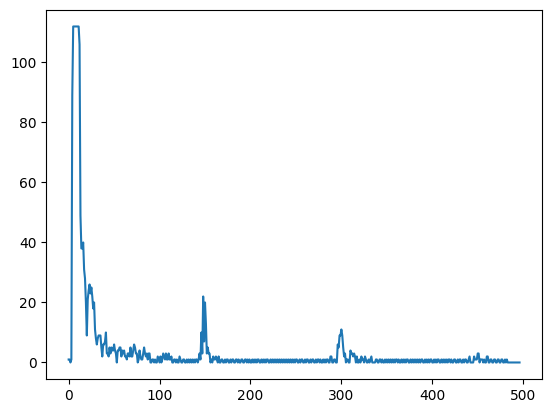

In [5]:
x = 208
y = 397

plt.plot(aligned[x,y])

### CScan

In [80]:
csm = CscanManager()

In [81]:
csm.define_gate1(0,30, lim = 40)
csm.define_gate2(40,200, lim = 5)

In [82]:
csm.compute(aligned[x,y])

89.0 10.0


18.980073129127234

In [74]:
att = np.apply_along_axis(csm.compute, 2, aligned)

111.0 22.0
112.0 22.0
112.0 22.0
112.0 22.0
112.0 22.0
112.0 22.0
112.0 22.0
112.0 22.0
112.0 22.0
112.0 22.0
111.0 22.0
111.0 22.0
112.0 22.0
112.0 22.0
112.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
112.0 22.0
111.0 22.0
112.0 22.0
112.0 22.0
111.0 22.0
112.0 22.0
112.0 22.0
112.0 22.0
112.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
112.0 22.0
112.0 22.0
111.0 22.0
112.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
112.0 22.0
112.0 22.0
112.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
112.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
112.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
112.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
112.0 22.0
112.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
112.0 22.0
111.0 22.0
111.0 22.0
112.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
112.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0
111.0 22.0

C:\Users\alberto.vicente\AppData\Local\Temp\ipykernel_7136\3814647725.py:43: RuntimeWarning: divide by zero encountered in divide
  return ((10 *  np.log10(np.divide(peak2, peak1)+0.0001)) *(-2))
C:\Users\alberto.vicente\AppData\Local\Temp\ipykernel_7136\3814647725.py:43: RuntimeWarning: invalid value encountered in divide
  return ((10 *  np.log10(np.divide(peak2, peak1)+0.0001)) *(-2))


 0
0 0
0 0
0 0
0 6.0
58.0 10.0
79.0 14.0
93.0 18.0
103.0 21.0
109.0 22.0
111.0 22.0
112.0 23.0
112.0 23.0
112.0 22.0
110.0 22.0
104.0 21.0
95.0 18.0
80.0 15.0
59.0 10.0
45.0 5.0
59.0 7.0
68.0 8.0
72.0 9.0
73.0 10.0
71.0 11.0
69.0 13.0
70.0 14.0
70.0 16.0
70.0 17.0
71.0 18.0
71.0 19.0
71.0 20.0
72.0 20.0
73.0 19.0
73.0 19.0
72.0 20.0
71.0 21.0
70.0 22.0
69.0 22.0
69.0 22.0
70.0 22.0
70.0 21.0
71.0 19.0
70.0 18.0
69.0 16.0
68.0 14.0
70.0 13.0
70.0 10.0
71.0 8.0
71.0 6.0
71.0 6.0
71.0 5.0
71.0 5.0
72.0 6.0
72.0 8.0
72.0 9.0
73.0 10.0
73.0 11.0
73.0 11.0
73.0 12.0
73.0 14.0
73.0 15.0
73.0 16.0
73.0 17.0
71.0 18.0
71.0 19.0
70.0 20.0
71.0 21.0
70.0 21.0
69.0 21.0
70.0 22.0
70.0 22.0
71.0 22.0
72.0 22.0
72.0 21.0
72.0 21.0
72.0 21.0
71.0 21.0
71.0 20.0
70.0 19.0
70.0 18.0
70.0 17.0
71.0 16.0
71.0 16.0
71.0 17.0
71.0 17.0
72.0 17.0
72.0 16.0
72.0 16.0
73.0 16.0
73.0 17.0
73.0 17.0
72.0 17.0
72.0 17.0
72.0 17.0
72.0 18.0
70.0 19.0
71.0 20.0
71.0 20.0
71.0 20.0
72.0 19.0
73.0 18.0
74.0 16.0
74.

In [75]:
att[x,y]

10.387629515470255

In [76]:
import napari

viewer = napari.view_image(att, colormap='turbo')


In [77]:
ndt.write_tiff(att,"att.tiff")